In [22]:
from matplotlib import pyplot as plt
import numpy as np

In [12]:
directories = ['resnet_log', 'resnet_log_trial2', 'resnet_log_trial3', 'resnet_log_missing_depths']
#directories = ['cifar100_resnet_log_MSE', 'cifar100_resnet_log_MSE_1']
#directories = ['less_data_cifar10_resnet_log']
#directories = ['imagenet32_normalized_log']
#directories = ['resnet_cats_dogs_log']
#directories = ['imagenet32_zero_init_log']
width =8
classes = 10
depths = [10, 12, 14, 16, 18, 20, 22, 26, 30, 34, 38, 42, 46, 50]
data_all = []
for d in directories:
    filename = d + "/log_width{}.txt".format(width)
    #filename = d + "/log_width{}_{}classes.txt".format(width, classes)
    f = open(filename)
    data = f.readlines()
    print(data)
    data_temp = [i[:-1] for i in data[1:-1]] + [data[-1]]
    data = [i.split('\t') for i in data_temp]
    data = [[float(j) for j in i if j != ''] for i in data]
    data_all.append(data)
#     depths = [i[0] for i in data]
#     train_loss = [i[1] for i in data]
#     train_err = [100 - i[2] for i in data]
#     test_loss = [i[3] for i in data]
#     test_err = [100 - i[4] for i in data]

['depth\ttrain_loss\ttrain_acc\ttest_loss\ttest_acc\n', '10\t0.22329\t87.788\t0.27669\t83.22\n', '14\t0.11083\t93.66\t0.23301\t84.57\n', '18\t0.052707\t97.332\t0.19849\t87.19\n', '22\t0.038697\t98.14\t0.20262\t86.78\n', '26\t0.026875\t98.684\t0.18793\t87.94\n', '30\t0.019999\t99.06\t0.19013\t87.92\n', '34\t0.015145\t99.284\t0.19561\t87.87\n', '38\t0.01282\t99.424\t0.18736\t88.62\n', '42\t0.011148\t99.496\t0.19302\t88.13\n', '46\t0.0092158\t99.632\t0.18104\t88.76\n', '50\t0.0091575\t99.588\t0.18959\t88.51\n']
['depth\ttrain_loss\ttrain_acc\ttest_loss\ttest_acc\n', '10\t0.21667\t87.848\t0.27682\t83.06\n', '12\t0.12921\t92.44\t0.23801\t84.4\n', '14\t0.11169\t93.668\t0.22863\t85.05\n', '16\t0.1015\t94.328\t0.22239\t85.22\n', '18\t0.054046\t97.236\t0.20368\t86.61\n', '20\t0.039264\t98.076\t0.20276\t86.74\n', '22\t0.03563\t98.244\t0.19764\t87.12\n', '26\t0.026109\t98.776\t0.19501\t87.46\n', '30\t0.023461\t98.84\t0.19453\t87.7\n', '34\t0.015194\t99.264\t0.18788\t88.48\n', '38\t0.011265\t99.51

In [13]:
model = "test"
metric = "loss"
key = model + '_' + metric
idx = {'train_loss':1, 'train_acc': 2, 'test_loss':3, 'test_acc': 4}

# plot test loss
losses = []

for d in depths:
    loss_vals = []
    for data in data_all:
        for i in data:
            if i[0] == d:
                loss_vals.append(i[idx[key]]/10)
                break
    losses.append(loss_vals)
    
    
means = [sum(i)/len(i) for i in losses]
sigmas = [np.std(np.array(i)) for i in losses]
              
maxs = [max(losses[i]) - means[i] for i in range(len(losses))]
mins = [means[i] - min(losses[i]) for i in range(len(losses))]

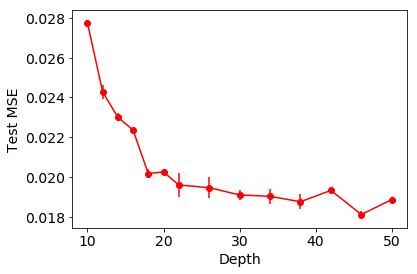

In [14]:
plt.rcParams.update({'font.size': 14})
ylabel = "Test (%)" if metric == "acc" else "Test MSE"
plt.ylabel(ylabel)
#plt.ylim(0.1, 1.)
plt.xlabel("Depth")
#plt.title('{} classes, width = {}, {}'.format(classes, width, model))
color = 'b' if model == "train" else 'r'
plt.errorbar(depths, means, [sigmas, sigmas], marker = 'o', color=color, label= 'width={}, test'.format(width))
#plt.ylim(0.95, 1.005)
plt.show()
means8=means

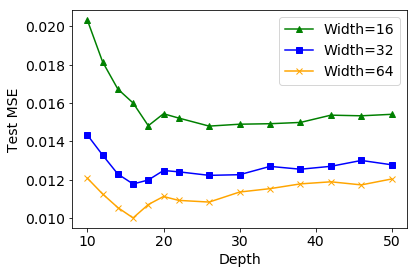

In [40]:
plt.ylabel("Test MSE")
plt.xlabel("Depth")
#plt.title('Train Loss')
#plt.plot(depths, means8, marker = 'o', color='r', label= 'Width=8')
plt.plot(depths, means16, marker = '^', color='g', label= 'Width=16')
plt.plot(depths, means32,  marker = 's', color='b', label= 'Width=32')
plt.plot(depths, means64, marker = 'x', color='orange', label= 'Width=64')
plt.legend()
plt.show()

In [17]:
by_width = []
for i in range(len(depths)):
    by_width.append([means8[i], means16[i], means32[i], means64[i]])

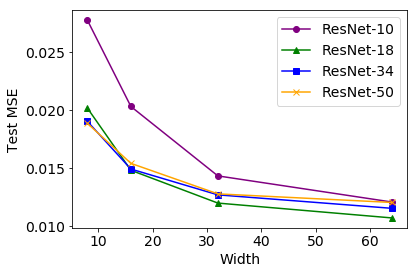

In [25]:
plt.ylabel("Test MSE")
plt.xlabel("Width")

plt.plot([8, 16, 32, 64], by_width[0], marker = 'o', color='purple', label= 'ResNet-10')
plt.plot([8, 16, 32, 64], by_width[4], marker = '^', color='g', label= 'ResNet-18')
plt.plot([8, 16, 32, 64], by_width[9],  marker = 's', color='b', label= 'ResNet-34')
plt.plot([8, 16, 32, 64], by_width[-1], marker = 'x', color='orange', label= 'ResNet-50')

plt.legend()
plt.show()

In [42]:
from PIL import Image
import random
import torch
import torchvision

154

In [35]:
img_np = np.random.randint(0, 255, size = [8, 8, 3], dtype=np.uint8)

In [36]:
img_np.shape

(8, 8, 3)

In [38]:
img = Image.fromarray(img_np)

In [43]:
transform = torchvision.transforms.ToTensor()

In [44]:
transform(img)

tensor([[[0.3608, 0.6706, 0.6235, 0.8784, 0.1490, 0.0392, 0.6431, 0.4431],
         [0.4157, 0.0784, 0.9569, 0.2588, 0.7373, 0.1804, 0.9765, 0.8784],
         [0.3333, 0.6196, 0.7765, 0.3961, 0.5059, 0.4078, 0.6039, 0.9569],
         [0.5059, 0.6157, 0.6039, 0.0706, 0.4627, 0.6078, 0.4627, 0.5804],
         [0.7137, 0.7490, 0.4314, 0.1608, 0.2039, 0.7333, 0.8353, 0.1843],
         [0.0471, 0.3843, 0.8471, 0.5882, 0.2039, 0.6784, 0.1922, 0.3922],
         [0.2392, 0.4353, 0.4941, 0.9059, 0.8745, 0.2588, 0.5020, 0.4863],
         [0.6235, 0.3294, 0.8353, 0.2863, 0.6549, 0.3804, 0.3529, 0.7020]],

        [[0.8039, 0.8863, 0.2510, 0.4118, 0.9255, 0.4980, 0.8392, 0.5647],
         [0.7137, 0.2471, 0.4745, 0.4275, 0.4235, 0.6235, 0.6235, 0.9216],
         [0.4784, 0.6745, 0.9373, 0.3255, 0.3451, 0.4157, 0.8510, 0.7020],
         [0.7529, 0.2157, 0.9843, 0.4667, 0.6980, 0.8353, 0.0627, 0.4196],
         [0.9333, 0.1490, 0.4745, 0.7961, 0.6471, 0.5412, 0.7255, 0.0000],
         [0.6667, 0.792

In [45]:
img_np

array([[[ 92, 205,  81],
        [171, 226,  31],
        [159,  64,   0],
        [224, 105, 105],
        [ 38, 236,  76],
        [ 10, 127,  17],
        [164, 214, 233],
        [113, 144,  32]],

       [[106, 182,  27],
        [ 20,  63,  71],
        [244, 121, 216],
        [ 66, 109,  48],
        [188, 108,  25],
        [ 46, 159, 159],
        [249, 159,  95],
        [224, 235, 233]],

       [[ 85, 122,  41],
        [158, 172, 160],
        [198, 239,  86],
        [101,  83,  41],
        [129,  88, 147],
        [104, 106, 141],
        [154, 217, 157],
        [244, 179, 169]],

       [[129, 192, 246],
        [157,  55, 191],
        [154, 251, 192],
        [ 18, 119, 124],
        [118, 178,  29],
        [155, 213,  51],
        [118,  16, 225],
        [148, 107, 103]],

       [[182, 238, 198],
        [191,  38, 201],
        [110, 121, 237],
        [ 41, 203, 136],
        [ 52, 165,  66],
        [187, 138,  94],
        [213, 185, 141],
        [ 47,   0